# TOV Solver for an extremal EoS

# (X) Old discontinued code

### (X) Original TOV test: non-interacting pure neutron Fermi gas, relativistic EoS (does not produce good plots)

In [1]:
# # r = distance from center
# # m = cumulative mass enclosed within distance r from center
# # p = pressure at distance r from center
# # epsilon = energy density at distance r from center

# # TOV simplified for relativistic pure neutron Fermi gas EoS, epsilon = 3 * p
# # Later will generalize TOV by adding gamma polytrope exponent and K EoS constant as parameters
# # Generalized EoS: p = K * epsilon ** gamma (right now gamma = 1 and K = 1/3)

# # TOV coded to be compatible w/ cgs units, but can't explicitly give units in code b/c solve_ivp() throws errors

# def TOV(r, p_and_m):
#     p = p_and_m[0]
#     m = p_and_m[1]
#     p_result = - G * (4 * p) * m / c ** 2 / r ** 2 * (1 + 4 * pi * r ** 3 * p / m / c ** 2) * (1 - 2 * G * m / c ** 2 / r) ** (-1)
#     m_result = 12 * pi * r ** 2 * p / c ** 2
#     return [p_result, m_result]

### (X) Original EoS: relativistic pure neutron Fermi gas, does not make good plots

In [2]:
# Original EoS: relativistic pure neutron Fermi gas
# (does not make good plots):

# def p_from_rho(rho):
#     result = c ** 2 * rho / 3
#     return result

# p_central = p_from_rho(rho_central)

## (X) Initial relativistic pure neutron Fermi gas EoS attempt

### Original solve_ivp() attempt, bad plots

In [3]:
# solution = solve_ivp(TOV,
#                      [small_r, R_attempt],
#                      [p_central, m_central])

In [4]:
# cumulative_mass = solution.y[1] * u.g
# cumulative_mass = cumulative_mass.to(u.solMass)
# cumulative_mass

In [5]:
# pressure = solution.y[0]
# pressure

In [6]:
# distance_from_center = solution.t * u.cm
# distance_from_center = distance_from_center.to(u.km)
# distance_from_center

### Plots of cumulative mass and pressure vs distance from center

In [7]:
# fig, [ax1, ax2] = plt.subplots(nrows = 1, ncols = 2, figsize = (16, 8))

# ax1.plot(distance_from_center, cumulative_mass);
# ax2.plot(distance_from_center, pressure);

### Now iterating over many radii and central mass densities

In [8]:
# rho_central_initial = 10 ** 14

# rho_central = rho_central_initial
# rho_central_step = 10 ** 14

# mass = []
# radius = []

# while rho_central <= 100 * rho_central_initial:

#     R_initial = 10 ** 5

#     R = R_initial
#     r_step = 10 ** 5

#     p_central = p_from_rho(rho_central)
#     m_central = M_from_r_and_rho(small_r, rho_central)
    
#     while R <= 60 * R_initial:
    
#         solution = solve_ivp(TOV,
#                              [small_r, R],
#                              [p_central, m_central])

#         cumulative_mass = (solution.y[1] * u.g).to(u.solMass)
    
#         mass.append(cumulative_mass[-1])
#         radius.append(R)
    
#         R += r_step

#     rho_central += rho_central_step

In [9]:
# mass = (mass * u.g).to(u.solMass)
# radius = (radius * u.cm).to(u.km)

In [10]:
# fig, ax = plt.subplots(figsize = (8, 8))

# ax.plot(radius, mass, markersize = 0.5, marker = "o", linestyle = "None");

### Trying odeint() instead of solve_ivp()

In [11]:
# distance_from_center = np.arange(small_r, R_attempt, small_r)

# solution = odeint(TOV,
#                   t = distance_from_center,
#                   y0 = [p_central, m_central],
#                   tfirst = True)

In [12]:
# distance_from_center = (distance_from_center * u.cm).to(u.km)

In [13]:
# cumulative_mass = solution[:, 1] * u.g
# cumulative_mass = cumulative_mass.to(u.solMass)
# # cumulative_mass

In [14]:
# pressure = solution[:, 0]
# #pressure

In [15]:
# fig, [ax1, ax2] = plt.subplots(nrows = 1, ncols = 2, figsize = (16, 8))

# ax1.plot(distance_from_center, cumulative_mass);
# ax2.plot(distance_from_center, pressure);

## (X) My EoS attempt

In [16]:
# r = distance from center
# m = cumulative mass enclosed within distance r from center
# p = pressure at distance r from center
# epsilon = energy density at distance r from center

# TOV and EoS coded to be compatible w/ cgs units, but can't explicitly give units in code b/c solve_ivp() throws errors
# Will input A and gamma and epsilon_0 using args paramter for odeint()

# TOV generalized for arbitrary relativity
# A_NR = EoS coefficient for non-relativistic case
# gamma_NR = EoS polytrope exponent for non-relativistic case
# A_R = EoS coefficient for relativistic case
# gamma_R = EoS polytrope exponent for relativistic case
# epsilon_0 = additional EoS coefficient for arbitrary relativity

# A = weight of non-relativistic case relative to relativistic case

# def TOV(r, p_and_m, K_NR, gamma_NR, K_R, gamma_R, A):
#     p = p_and_m[0]
#     m = p_and_m[1]
#     epsilon = A * (p / K_NR) ** (1 / gamma_NR) + (1 - A) * (p / K_R) ** (1 / gamma_R)
#     p_result = - G * epsilon * m / c ** 2 / r ** 2 * (1 + p / epsilon) * (1 + 4 * pi * r ** 3 * p / m / c ** 2) * (1 - 2 * G * m / c ** 2 / r) ** (-1)
#     m_result = 12 * pi * r ** 2 * p / c ** 2
#     return [p_result, m_result]

In [17]:
# EoS coded to be compatible w/ cgs units, but can't explicitly give units in code b/c solve_ivp() throws errors

# Arbitrary relativity EoS

# def EoS_minus_rho(p, A, K_NR, gamma_NR, K_R, gamma_R, rho): # mass density minus rho
#     result = 1 / c ** 2 * (A * (p / K_NR) ** (1 / gamma_NR) + (1 - A) * (p / K_R) ** (1 / gamma_R)) - rho
#     return result

In [18]:
# def p_from_EoS(rho, K_NR, gamma_NR, K_R, gamma_R, A):
#     # p_test = 1
#     # rho_test = rho_from_EoS(A, p_test, K_NR, gamma_NR, K_R, gamma_R)

#     result = optimize.brentq(EoS_minus_rho,
#                              0,
#                              10 ** 40,
#                              args = (A, K_NR, gamma_NR, K_R, gamma_R, rho))
#     while not math.isclose(rho_test, rho, rel_tol = 10 ** (-4)):
#     rho_test = rho_from_EoS(A, p_test, K_NR, gamma_NR, K_R, gamma_R)
#     p_test += K_R * (c ** 2 * rho) ** gamma_R / 10 ** 5

#     print(f"Reached this point, w/ rho_test = {rho_test:.2e}")
#     result = p_test

In [19]:
# This should be the only cell that is changed for different EoS

# Non-relativisitc and relativistic EoS for non-interacting pure
# neutron Fermi gas

# gamma_NR = 5 / 3
# gamma_R = 1
# K_NR = 6.483 * 10 ** (-26) # From Sanjay's paper, cgs
# K_R = 1 / 3 # cgs
# A = 0.0446 # Found from Sanjay's paper and Desmos

# p_central = p_from_EoS(rho_central, K_NR, gamma_NR, K_R, gamma_R, A)


# Central pressure for simple polytropic EoS

# p_central = p_from_simp_poly_EoS(rho_central, K_NR, gamma_NR)

In [20]:
# Keep this for all EoS

# distance_from_center = np.arange(small_r, R_attempt, small_r)

# solution = odeint(TOV,
#                   t = distance_from_center,
#                   y0 = [p_central, m_central],
#                   tfirst = True,
#                   args = (K_NR, gamma_NR, K_R, gamma_R, A))

In [21]:
# Iterating with lower resolution

# rho_central_initial = 1.0 * 10 ** 11
# mass = []
# radius = []
# pressure_list = []
# mass_density = []

# rho_central = rho_central_initial
# rho_central_step = rho_central
# rho_central_max = 1.0 * 10 ** 3 * rho_central

# while rho_central <= 1000 * rho_central_initial:

#     p_central = p_from_EoS(rho_central, K_NR, gamma_NR, K_R, gamma_R, A)
#     print("Reached this point")
#     m_central = M_from_r_and_rho(small_r, rho_central)

#     distance_from_center = np.arange(small_r, R_attempt, small_r)
    
#     solution = odeint(TOV,
#                       t = distance_from_center,
#                       y0 = [p_central, m_central],
#                       tfirst = True,
#                       args = (K_NR, gamma_NR, K_R, gamma_R, A))

#     distance_from_center = (distance_from_center * u.cm).to(u.km)
#     cumulative_mass = (solution[:, 1] * u.g).to(u.solMass)
#     pressure = solution[:, 0]
    
#     # fig, [ax1, ax2] = plt.subplots(nrows = 1, ncols = 2, figsize = (1, 0.5))

#     # ax1.plot(distance_from_center, cumulative_mass);
#     # ax2.plot(distance_from_center, pressure);

#     # Removing NaN and inf values from cumulative mass

#     cumulative_mass = cumulative_mass[~np.isnan(cumulative_mass)]
#     cumulative_mass = cumulative_mass[~np.isinf(cumulative_mass)]
    
#     max_cumulative_mass = np.max(cumulative_mass)
#     index = np.where(cumulative_mass == max_cumulative_mass)
#     mass.append(np.max(cumulative_mass.value))
#     radius.append(distance_from_center[index][-1].value)

#     rho_central += rho_central_step

# Iterating with intermediate resolution
  
# rho_central_step *= 10 ** 3
# rho_central_max *= 10 ** 3

## (X) Long-winded iterating over central mass densities

In [22]:
# rho_central_initial = 1.0 * 10 ** 11
# rho_central = rho_central_initial
# rho_central_step = rho_central
# rho_central_max = 1.0 * 10 ** 3 * rho_central

# for i in range(3):
#     while rho_central <= rho_central_max:
    
#         p_central = p_from_EoS(rho_central, gamma_NR, gamma_R, A_NR, A_R, epsilon_0)
#         print("Reached this point")
#         m_central = M_from_r_and_rho(small_r, rho_central)
    
#         distance_from_center = np.arange(small_r, R_attempt, small_r)
        
#         solution = odeint(TOV,
#                           t = distance_from_center,
#                           y0 = [p_central, m_central],
#                           tfirst = True,
#                           args = (gamma_NR, gamma_R, A_NR, A_R, epsilon_0))
    
#         distance_from_center = (distance_from_center * u.cm).to(u.km)
#         cumulative_mass = (solution[:, 1] * u.g).to(u.solMass)
#         pressure = solution[:, 0]
        
#         # fig, [ax1, ax2] = plt.subplots(nrows = 1, ncols = 2, figsize = (1, 0.5))
    
#         # ax1.plot(distance_from_center, cumulative_mass);
#         # ax2.plot(distance_from_center, pressure);
    
#         # Removing NaN and inf values from cumulative mass
    
#         cumulative_mass = cumulative_mass[~np.isnan(cumulative_mass)]
#         cumulative_mass = cumulative_mass[~np.isinf(cumulative_mass)]
        
#         max_cumulative_mass = np.max(cumulative_mass)
#         index = np.where(cumulative_mass == max_cumulative_mass)
#         mass.append(max_cumulative_mass.value)
#         radius.append(distance_from_center[index][-1].value)
#         mass_density.append(rho_central)
#         pressure_list.append(pressure[0])
    
#         rho_central += rho_central_step

#     rho_central_step *= 10 ** 3
#     rho_central_max *= 10 ** 3

## (X) Solving TOV: odeint() and solve_ivp()

In [23]:
# m_central = M_from_r_and_rho(small_r, rho_central)
# Central pressure for arbitrary relativity EoS
# p_central = p_from_EoS(rho_central, gamma_NR, gamma_R, A_NR, A_R, epsilon_0)

# odeint() method:

# distance_from_center = np.arange(small_r, R_attempt, small_r)

# solution = odeint(TOV,
#                   t = distance_from_center,
#                   y0 = [p_central, m_central],
#                   tfirst = True,
#                   args = (gamma_NR, gamma_R, A_NR, A_R, epsilon_0))


# solve_ivp() method:
# solution = solve_ivp(TOV,
#                      [small_r, R_attempt],
#                      [p_central, m_central],
#                      args = (gamma_NR, gamma_R, A_NR, A_R, epsilon_0))

In [24]:
# odeint() method:
# distance_from_center = (distance_from_center * u.cm).to(u.km)


# solve_ivp() method:
# distance_from_center = (solution.t * u.cm).to(u.km)

In [25]:
# odeint() method:
# cumulative_mass = (solution[:, 1] * u.g).to(u.solMass)


# solve_ivp() method:
# cumulative_mass = (solution.y[1] * u.g).to(u.solMass)

In [26]:
# odeint() method:
# pressure = solution[:, 0]


# solve_ivp() method:
# pressure = solution.y[0]

In [27]:
# m_central = M_from_r_and_rho(small_r, rho_central)
# p_central = p_from_EoS(rho_central[i], gamma_NR, gamma_R, A_NR, A_R, epsilon_0)

    # distance_from_center = np.arange(small_r, R_attempt, small_r)
    
    # solution = odeint(TOV,
    #                   t = distance_from_center,
    #                   y0 = [p_central, m_central[i]],
    #                   tfirst = True,
    #                   args = (gamma_NR, gamma_R, A_NR, A_R, epsilon_0))
    
    # distance_from_center = (distance_from_center * u.cm).to(u.km)
    # cumulative_mass = (solution[:, 1] * u.g).to(u.solMass)
    # pressure = solution[:, 0]

In [28]:
# This should be the only cell that is changed for different EoS

# Non-relativisitc and relativistic EoS for non-interacting pure
# neutron Fermi gas

# gamma_NR = 5 / 3
# gamma_R = 1
# A_NR = 2.4216 # Found from Sanjay's paper
# A_R = 2.8663 # Found from Sanjay's paper
# epsilon_0 = 5.346 * 10 ** 36 # Found from Sanjay's paper

## (X) Specifying the EoS (change this for different EoS)

## (X) Functions to find numerical EoS arrays for Fermi gas given some mass density (in natural units)

In [29]:
# # Fermi momentum
# def find_k_F(rho):
#     result = (3 * pi ** 2 * rho / m_N) ** (1 / 3)
#     return result

# # Energy density epsilon
# def find_epsilon(rho):
#     k_F = find_k_F(rho).value
#     integrand = lambda k: 1 / (2 * pi ** 2) * k ** 2 * np.sqrt(k ** 2 + m_N.value ** 2)
#     integral, _ = quad(integrand, 0, k_F)
#     result = g * integral * u.MeV ** 4
#     return result

# # Number density
# def find_num_density(rho):
#     k_F = find_k_F(rho).value
#     integrand = lambda k: 1 / (2 * pi ** 2) * k ** 2
#     integral, _ = quad(integrand, 0, k_F)
#     result = g * integral * u.MeV ** 3
#     return result

# # Chemical potential
# def find_chem_potential(rho):
#     k_F = find_k_F(rho)
#     result = np.sqrt(k_F ** 2 + m_N ** 2)
#     return result

# # Pressure
# def find_pressure(rho):
#     k_F = find_k_F(rho)
#     epsilon = find_epsilon(rho)
#     num_density = find_num_density(rho)
#     chem_potential = find_chem_potential(rho)
#     result = - epsilon + chem_potential * num_density
#     return result

# Good code

In [30]:
import numpy as np
from scipy.integrate import solve_ivp, odeint, quad
from astropy.constants import G, c
from numpy import pi
import astropy.units as u
import matplotlib.pyplot as plt
import sys
import math
np.set_printoptions(threshold=sys.maxsize)
from scipy import optimize
from sympy import symbols, diff

In [31]:
# Using natural units
# 197 MeV * fm = 1
# 1 fm = 1 / (197 MeV)
# 3e8 m = 1 s
# 3e8 m / s = 1
# 1 J = 1 kg * (m / s)^2
# 1 J = 1 / 9e16 kg

natural = [(u.MeV, u.fm ** (-1), lambda fm_inverse: 1 / 197 * fm_inverse, lambda MeV: 197 * MeV),
           (u.m, u.s, lambda s: 1 / c.value * s, lambda m: c.value * m),
           (u.kg, u.J, lambda J: c.value ** 2 * J, lambda kg: 1 / c.value ** 2 * kg),
           (u.m / u.s, u.dimensionless_unscaled, lambda dimensionless: 1 / c.value * dimensionless, lambda v: c.value * v),
           (u.fm, u.MeV ** (-1), lambda MeV_inverse: 1 / 197 * MeV_inverse, lambda fm: 197 * fm)
          ]

G = (G.value * (1 * u.m / u.s).to(u.dimensionless_unscaled, equivalencies = natural) ** 2 * (1 * u.m).to(u.fm).to(1 / u.MeV, equivalencies = natural) / (1 * u.kg).to(u.J, equivalencies = natural).to(u.MeV))
print(G)
G = G.value

6.7199660587126e-45 1 / MeV2


### Setting constants

In [32]:
# Everything in natural units unless otherwise specified
# r_small cannot be 0 b/c it would cause a singularity.

small_r = (0.1 * u.km).to(u.fm).to(1 / u.MeV, equivalencies = natural).value
m_N = 939.565 * u.MeV    # Natural units
n_0 = 0.16 / (1 * u.fm).to(1 / u.MeV, equivalencies = natural) ** 3    # Nuclear saturation density

# Setting nuclear parameters
a = 13.0 * u.MeV
alpha = 0.49
b = 3.21 * u.MeV
beta = 2.47

# Setting transition energy densities for piece-wise EoS
epsilon_c = 150 * u.MeV / (1 * u.fm).to(1 / u.MeV, equivalencies = natural)**3    # Critical energy density
epsilon_delta = 650 * u.MeV / (1 * u.fm).to(1 / u.MeV, equivalencies = natural)**3    # Upper turning point

### Setting central cumulative mass initial condition

In [33]:
def M_from_r_and_rho(r, rho):
    result = 4 * pi * rho * r ** 3 / 3
    return result

### Horizontal axis scale

In [34]:
# Everything in natural units unless otherwise specified

R_attempt = (100 * u.km).to(u.fm).to(1 / u.MeV, equivalencies = natural).value

## Functions to find numerical EoS arrays for Fermi gas and nuclear strong interaction given some number density (in natural units)

In [35]:
# Non-rest-mass energy E
def find_E(num_density):
    result = a * (num_density / n_0) ** alpha + b * (num_density / n_0) ** beta
    return result

# Energy density epsilon
def find_epsilon(num_density):
    E = find_E(num_density)
    result = num_density * (E + m_N)
    return result

# Chemical potential
def find_chem_potential(num_density):
    result = a * (alpha + 1) * (num_density / n_0) ** alpha + b * (beta + 1) * (num_density / n_0) ** beta + m_N
    return result

# Pressure
def find_pressure(num_density):
    epsilon = find_epsilon(num_density)
    chem_potential = find_chem_potential(num_density)
    num_density_c = num_density_from_energy_density(epsilon_c.value) * u.MeV ** 3
    chem_potential_c = find_chem_potential(num_density_c)
    pressure_c = - epsilon_c + chem_potential_c * num_density_c

    # Piece-wise extremal EoS
    if epsilon.value < epsilon_c.value:
        result = - epsilon + chem_potential * num_density    # Gandolfi nuclear EoS
    else:
        if epsilon.value < epsilon_delta.value:
            result = pressure_c    # Flat EoS
        else:
            result = pressure_c + (epsilon - epsilon_delta)    # EoS slope = 1
    
    return result

In [36]:
# Finding number density as a function of energy density

def energy_density_minus_target_epsilon(n, target_epsilon):
    n = n * u.MeV ** 3
    result = find_epsilon(n).value - target_epsilon
    return result

def num_density_from_energy_density(epsilon):
    b = 10 ** 12
    if energy_density_minus_target_epsilon(0, epsilon) > 0:
        print(f"find_epsilon is {find_epsilon(0 * u.MeV ** 3)} and epsilon is {epsilon}.")
        return
    result = optimize.brentq(energy_density_minus_target_epsilon,
                             0,
                             b,
                             args = (epsilon,))
    return result

In [37]:
epsilon = []
pressure = []

n = np.logspace(-0.3, 1, num = 200) * n_0

for num_density in n:
    epsilon_in_MeV = find_epsilon(num_density).value
    epsilon_in_MeV_and_fm = epsilon_in_MeV * (1 * u.MeV).to(1 / u.fm, equivalencies = natural) ** 3
    epsilon.append(epsilon_in_MeV_and_fm.value)
    pressure_in_MeV = find_pressure(num_density).value
    pressure_in_MeV_and_fm = pressure_in_MeV * (1 * u.MeV).to(1 / u.fm, equivalencies = natural) ** 3
    pressure.append(pressure_in_MeV_and_fm.value)

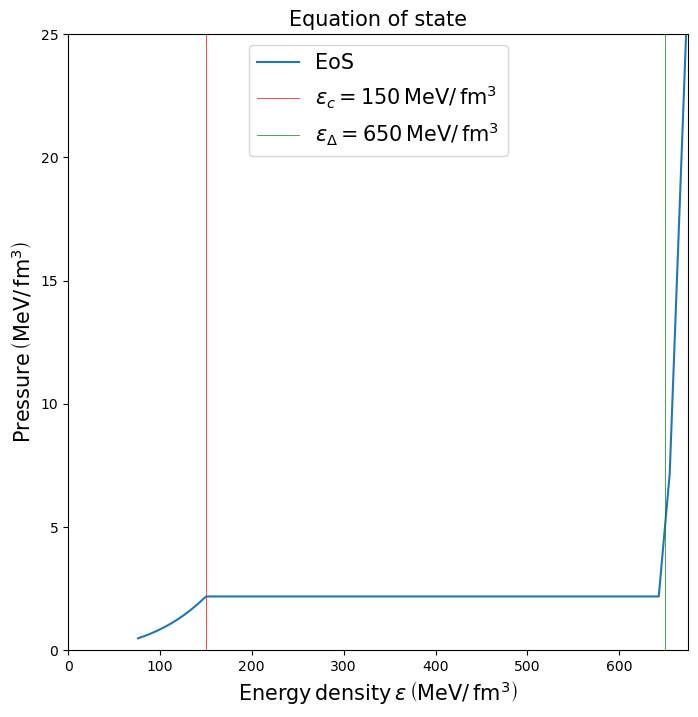

In [38]:
fig, ax = plt.subplots(figsize = (8, 8))

epsilon_c_MeV_and_fm = epsilon_c * (1 * u.MeV).to(1 / u.fm, equivalencies = natural) ** 3
epsilon_delta_MeV_and_fm = epsilon_delta * (1 * u.MeV).to(1 / u.fm, equivalencies = natural) ** 3
ax.set_title("Equation of state", fontsize = 15);
ax.set_xlabel(r"$\mathrm{Energy\,density}\,\epsilon\,\left(\mathrm{MeV/\,fm^3}\right)$", fontsize = 15);
ax.set_ylabel(r"$\mathrm{Pressure\,\left(MeV/\,fm^3\right)}$", fontsize = 15);
ax.set_xlim(0, epsilon_delta_MeV_and_fm.value + 25);
ax.set_ylim(0, 25);
ax.plot(epsilon, pressure, label = "EoS");
ax.axvline(x = epsilon_c_MeV_and_fm.value, color = "red", linewidth = 0.5, label = r"$\epsilon_{c}=150\,\mathrm{MeV/\,fm^3}$");
ax.axvline(x = epsilon_delta_MeV_and_fm.value, color = "green", linewidth = 0.5, label = r"$\epsilon_{\Delta}=650\,\mathrm{MeV/\,fm^3}$");
ax.legend(fontsize = 15);

plt.savefig("Piecewise_EoS.pdf", bbox_inches = "tight");
plt.savefig("Piecewise_EoS.jpg", bbox_inches = "tight");

## Generalized TOV and polytropic EoS (this works for NR pure neutron Fermi gas)

In [39]:
# r = distance from center
# m = cumulative mass enclosed within distance r from center
# p = pressure at distance r from center
# epsilon = energy density at distance r from center

# TOV and EoS coded to be compatible w/ cgs units, but can't explicitly give units in code b/c solve_ivp() throws errors
# Will input A and gamma and epsilon_0 using args paramter for odeint()

# TOV generalized for arbitrary relativity
# A_NR = EoS coefficient for non-relativistic case
# gamma_NR = EoS polytrope exponent for non-relativistic case
# A_R = EoS coefficient for relativistic case
# gamma_R = EoS polytrope exponent for relativistic case
# epsilon_0 = additional EoS coefficient for arbitrary relativity

# EoS returns energy density

def EoS(p, A_NR, A_R, gamma_NR, gamma_R, epsilon_0):
    result = A_NR * p ** (1 / gamma_NR) * epsilon_0 ** (1 - 1 / gamma_NR) + A_R * p ** (1 / gamma_R) * epsilon_0 ** (1 - 1 / gamma_R)
    return result

def TOV(r, p_and_m):
    p = p_and_m[0]
    m = p_and_m[1]
    if num_density_from_pressure(p, r) is None:
        return [0, 0]
    n = num_density_from_pressure(p, r) * u.MeV ** 3
    epsilon = find_epsilon(n).value
    print(f"number density is {n}")
    rel_factors = (1 + p / epsilon) * (1 + 4 * pi * r ** 3 * p / m) * (1 - 2 * G * m / r) ** (-1)
    p_result = - G * epsilon * m / r ** 2 * rel_factors
    m_result = 4 * pi * r ** 2 * epsilon
    return [p_result, m_result]

In [40]:
# Finding number density as a function of pressure

def pressure_minus_target_p(n, target_p):
    n = n * u.MeV ** 3
    result = find_pressure(n).value - target_p
    return result

def num_density_from_pressure(p, r):
    b = 10 ** 8
    if pressure_minus_target_p(0, p) > 0:
        print(f"Distance from center is {(r / u.MeV).to(u.fm, equivalencies = natural).to(u.km)}, w/ find_pressure {find_pressure(0 * u.MeV ** 3)} and p {p}.")
        return
    result = optimize.brentq(pressure_minus_target_p,
                             0,
                             b,
                             args = (p,))
    return result

### TOV solver function

In [41]:
# Keep this for all EoS

def solve_TOV(n_central, p_central):
    epsilon_central = find_epsilon(n_central * u.MeV ** 3).value
    m_central = M_from_r_and_rho(small_r, epsilon_central)
    def reached_surface(t, y):
        return y[0]

    reached_surface.terminal = True
    reached_surface.direction = -1
    
    solution = solve_ivp(TOV,
                         [small_r, R_attempt],
                         [p_central, m_central],
                         events = reached_surface
                        )

    distance_from_center = (solution.t / u.MeV).to(u.fm, equivalencies = natural).to(u.km)
    print(f"Mass is {(solution.y[1][-1] * u. MeV):.2e}.")
    cumulative_mass = (solution.y[1] * u.MeV).to(u.J).to(u.kg, equivalencies = natural).to(u.solMass)
    pressure = solution.y[0]

    result = distance_from_center, cumulative_mass, pressure
    return result

### Solving TOV example

In [42]:
# Nuclear saturation number density is 0.16 fm^(-3)
n_central = 7 * n_0
print(f"{n_0:.3e}")
p_central = find_pressure(n_central).value
print(f"p_central is {p_central}")
distance_from_center, cumulative_mass, pressure = solve_TOV(n_central.value, p_central)

1.223e+06 MeV3
p_central is 6742676748.502879
number density is 8562817.760000004 MeV3
number density is 8562817.760000004 MeV3
number density is 8562817.760000004 MeV3
number density is 8562817.760000004 MeV3
number density is 8562817.760000004 MeV3
number density is 8562817.760000004 MeV3
number density is 8562817.760000004 MeV3
number density is 8562817.760000004 MeV3
number density is 8562817.760000004 MeV3
number density is 8562817.760000004 MeV3
number density is 8562817.760000004 MeV3
number density is 8562817.760000004 MeV3
number density is 8562817.760000004 MeV3
number density is 8562817.760000004 MeV3
number density is 8562817.760000004 MeV3
number density is 8562817.760000004 MeV3
number density is 8562817.760000004 MeV3
number density is 8562817.760000004 MeV3
number density is 8562817.760000002 MeV3
number density is 8562817.760000002 MeV3
number density is 8562817.760000002 MeV3
number density is 8562817.760000002 MeV3
number density is 8562817.76 MeV3
number density is 

KeyboardInterrupt: 

In [ ]:
fig, [ax1, ax2] = plt.subplots(nrows = 1, ncols = 2, figsize = (16, 8))

ax1.set_title("Cumulative mass vs distance from center", fontsize = 18);
ax1.set_xlabel("Distance from center (km)", fontsize = 18);
ax1.set_ylabel(r"Cumulative mass ($\mathrm{M_{\odot}}$)", fontsize = 18);
# ax1.set_xlim(0, 20);
# ax1.set_ylim(0, 0.6);
ax1.plot(distance_from_center, cumulative_mass);
ax2.set_title("Pressure vs distance from center", fontsize = 18);
ax2.set_xlabel("Distance from center (km)", fontsize = 18);
ax2.set_ylabel(r"Pressure $\left(\mathrm{MeV/\,fm^3}\right)$", fontsize = 18);
# ax2.set_xlim(0, 20);
ax2.plot(distance_from_center, pressure);

In [ ]:
print(f"Mass is {np.max(cumulative_mass):.2f}.")

## Making mass-radius plot

In [ ]:
mass = []
radius = []
pressure_list = []

# Nuclear saturation number density is 0.16 fm^(-3)
n_central = np.logspace(-0.3, 1, num = 50) * n_0

for num_density in n_central:
    p_central = find_pressure(num_density).value
    distance_from_center, cumulative_mass, pressure = solve_TOV(num_density.value, p_central)
    print("Solved TOV")

    # Removing NaN and inf values from cumulative mass
    
    cumulative_mass = cumulative_mass[~np.isnan(cumulative_mass)]
    cumulative_mass = cumulative_mass[~np.isinf(cumulative_mass)]
        
    mass.append(cumulative_mass[-1].value)
    radius.append(distance_from_center[-1].value)
    pressure_list.append(pressure[0])

In [ ]:
mass = mass * u.solMass
radius = radius * u.km
print(mass, radius)

In [ ]:
# modified_radius = radius[(mass.value < 10) & (radius.value < 100)]
# modified_mass = mass[(mass.value < 10) & (radius.value < 100)]

# print(modified_mass, modified_radius)

In [ ]:
fig, ax = plt.subplots(figsize = (8, 8))
ax.set_title(r"NS mass vs radius - piecewise EoS, $\epsilon_{\Delta}=650\,\mathrm{\frac{MeV}{fm^{3}}}$", fontsize = 15);
ax.set_xlabel("Radius (km)", fontsize = 15);
ax.set_ylabel(r"Mass ($\mathrm{M_{\odot}}$)", fontsize = 15);
# ax2.set_ylim(0, 1);
# ax2.set_xlim(0, 25);
# ax.set_ylim(0.3, 0.8);
# ax1.set_ylim(-0.25 * 10 ** 303, 0.01 * 10 ** 304)
# ax1.plot(np.log(mass_density.value), np.log(pressure_list), "o");
ax.plot(radius, mass, "--o");

plt.savefig("piecewise_mass_radius_plot_max_mass_2.jpg", bbox_inches = "tight");
plt.savefig("piecewise_mass_radius_plot_max_mass_2.pdf", bbox_inches = "tight");

In [ ]:
index = np.where(mass == np.max(mass))
print(f"Maximum mass is {np.max(mass)} and radius is {radius[index]}.")